In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
bigmart=pd.read_csv('train_bm.csv')

In [3]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

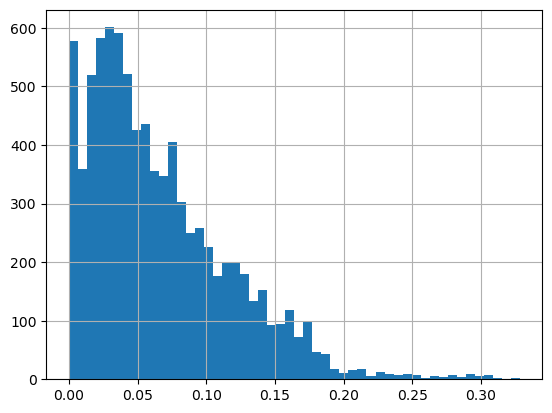

In [4]:
bigmart['Item_Visibility'].hist(bins=50)

In [6]:
item_visiability_squareroot=np.sqrt(bigmart['Item_Visibility'])

<AxesSubplot:>

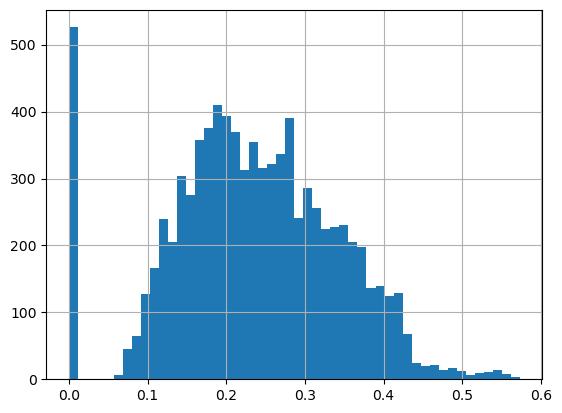

In [7]:
item_visiability_squareroot.hist(bins=50)

In [10]:
item_visibility_log=np.log(bigmart['Item_Visibility']+0.1)

<AxesSubplot:>

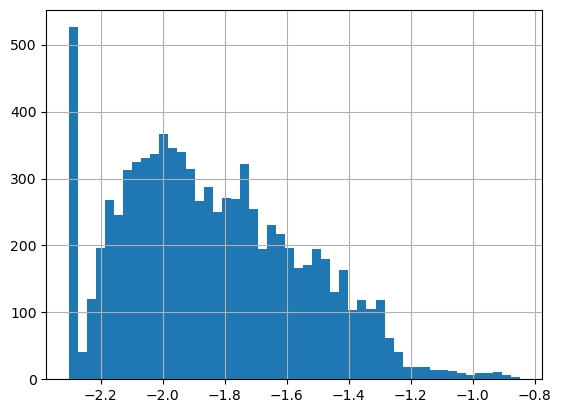

In [11]:
item_visibility_log.hist(bins=50)

In [15]:
item_visibility=bigmart['Item_Visibility']*100
item_vis_log=np.log(item_visibility+1)

<AxesSubplot:>

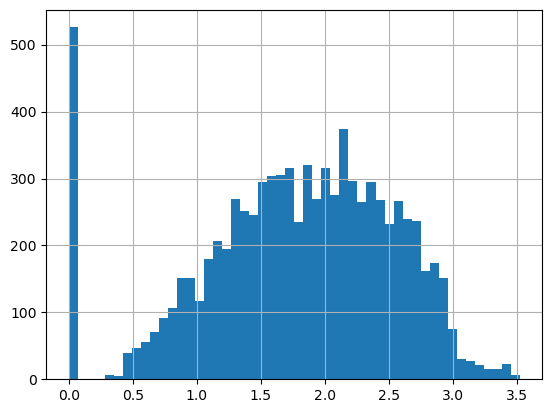

In [16]:
item_vis_log.hist(bins=50)

In [17]:
data=bigmart[['Item_Visibility','Item_MRP']]
data.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=["Item_Visibility",'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=['Item_Visibility','Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,-0.970732,1.747454
1,-0.908111,-1.489023
2,-0.956917,0.010040
3,-1.281758,0.660050
4,-1.281758,-1.399220


In [26]:
bigmart['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [27]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [28]:
bigmart_encoded=pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
le.fit_transform(['Small','Medium','High'])

array([2, 1, 0], dtype=int64)

In [33]:
bigmart['Outlet_Size']=bigmart['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [34]:
bigmart.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [35]:
temp=bigmart['Item_Identifier'].value_counts()

In [36]:
temp.head()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
Name: Item_Identifier, dtype: int64

In [38]:
bigmart['Item_identifier_count']=bigmart['Item_Identifier'].apply(lambda x:temp[x])
bigmart[['Item_Identifier','Item_identifier_count']].head()

,Item_Identifier,Item_identifier_count
0,FDA15,8
1,DRC01,6
2,FDN15,7
3,FDX07,6
4,NCD19,6


In [39]:
for i in range(0,len(bigmart)):
    if bigmart['Item_identifier_count'][i]<4:
        bigmart['Item_Identifier'][i]='other'
bigmart.head(7)
    

C:\Users\Vinnusss\AppData\Local\Temp\ipykernel_9896\1408475275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmart['Item_Identifier'][i]='other'


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_identifier_count
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,6
5,other,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,Tier 3,Supermarket Type2,556.6088,3
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,2.0,Tier 3,Supermarket Type1,343.5528,8


In [9]:
import pandas as pd



In [10]:
#featue interaction
loan_data=pd.read_csv('train_loan.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
loan_data['Total_income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
loan_data[['ApplicantIncome','CoapplicantIncome','Total_income']].head()

,ApplicantIncome,CoapplicantIncome,Total_income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0


In [12]:
loan_data['loan_income_ratio']=loan_data['LoanAmount']/loan_data['ApplicantIncome']
loan_data[['ApplicantIncome','LoanAmount','loan_income_ratio']].head()

,ApplicantIncome,LoanAmount,loan_income_ratio
0,5849,NaN,NaN
1,4583,128.0,0.027929
2,3000,66.0,0.022000
3,2583,120.0,0.046458
4,6000,141.0,0.023500


In [13]:
stroke_data=pd.read_csv('stroke prediction.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [14]:
stroke_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [16]:
stroke_data['smoking_status_NA']=stroke_data['smoking_status'].isnull()*1
stroke_data[['smoking_status_NA','smoking_status']].head()

,smoking_status_NA,smoking_status
0,1,NaN
1,0,never smoked
2,1,NaN
3,0,formerly smoked
4,1,NaN


In [17]:
import pandas as pd

In [18]:
bigmart=pd.read_csv('train_bm.csv')

In [20]:
temp=bigmart['Item_Type'].value_counts()

In [21]:
bigmart['Item_Type_Count']=bigmart['Item_Type'].apply(lambda x:temp[x])
bigmart[['Item_Identifier','Item_Type','Item_Type_Count']].head()


,Item_Identifier,Item_Type,Item_Type_Count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


In [26]:
bigmart.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [27]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('No2 dataset.csv')

In [31]:
df.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

In [33]:
df['Date_Time']=pd.to_datetime(df['Date_Time'],format='%d/%m/%Y %H.%M.%S')

In [34]:
df.dtypes

Date_Time    datetime64[ns]
NO2(GT)               int64
dtype: object

In [35]:
df['Date_Time'].max(),df['Date_Time'].min()

(Timestamp('2004-09-24 02:00:00'), Timestamp('2004-03-10 18:00:00'))

In [36]:
df['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int64

In [37]:
df['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int64

In [38]:
df['Date_Time'].dt.dayofweek.head()

0    2
1    2
2    2
3    2
4    2
Name: Date_Time, dtype: int64

In [42]:
df['Date_Time'].dt.weekday_name.head(7)

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [43]:
df['Date_Time'].dt.month.head(7)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
Name: Date_Time, dtype: int64

In [44]:
df['Date_Time'].dt.is_month_end.head(7)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Date_Time, dtype: bool

In [46]:
new_df=pd.DataFrame({'Year':df['Date_Time'].dt.year,
                    'month':df['Date_Time'].dt.month,
                     'day':df['Date_Time'].dt.day,
                     'hour':df['Date_Time'].dt.hour,
                     'day of year':df['Date_Time'].dt.dayofyear,
                     'week':df['Date_Time'].dt.week,
                     'dayofweek':df['Date_Time'].dt.dayofweek,
                     'quarter':df['Date_Time'].dt.quarter
                    })
new_df.head()

,Year,month,day,hour,day of year,week,dayofweek,quarter
0,2004,3,10,18,70,11,2,1
1,2004,3,10,19,70,11,2,1
2,2004,3,10,20,70,11,2,1
3,2004,3,10,21,70,11,2,1
4,2004,3,10,22,70,11,2,1


In [47]:
complete_data=pd.concat([df,new_df],axis=1)
complete_data.head()

,Date_Time,NO2(GT),Year,month,day,hour,day of year,week,dayofweek,quarter
0,2004-03-10 18:00:00,166,2004,3,10,18,70,11,2,1
1,2004-03-10 19:00:00,1174,2004,3,10,19,70,11,2,1
2,2004-03-10 20:00:00,131,2004,3,10,20,70,11,2,1
3,2004-03-10 21:00:00,172,2004,3,10,21,70,11,2,1
4,2004-03-10 22:00:00,131,2004,3,10,22,70,11,2,1


In [49]:
complete_data['is_weekday']=0
for i in range(0,len(complete_data)):
    if (complete_data['dayofweek'][i]==5 | (complete_data['dayofweek'][i]==6)):
        complete_data['is_weekday'][i]=0
    else:
        complete_data['is_weekday'][i]=1
        

In [56]:
agent=pd.read_csv('agent_classification.csv')
agent.head()


,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [57]:
agent[['Application_Receipt_Date','Applicant_BirthDate']].head()

,Application_Receipt_Date,Applicant_BirthDate
0,4/16/2007,12/19/1971
1,4/16/2007,2/17/1983
2,4/16/2007,1/16/1966
3,4/16/2007,2/3/1988
4,4/16/2007,7/4/1985


In [60]:
agent['Application_Receipt_Date']=pd.to_datetime(agent['Application_Receipt_Date'],format='%m/%d/%Y')
agent['Application_BirthDate']=pd.to_datetime(agent['Applicant_BirthDate'],format='%m/%d/%Y' )

In [62]:
(agent['Application_Receipt_Date'][0]-agent['Applicant_BirthDate'][0]).days

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [69]:
import featuretools as ft

In [68]:
!pip install  featuretools

In [71]:
df=pd.read_csv('train_bm.csv')
features=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']


In [72]:
es=ft.EntitySet(id='bigmart')

In [73]:
es

Entityset: bigmart
  DataFrames:
  Relationships:
    No relationships

In [76]:
es.entity_from_dataframe(entity_id='data_1',dataframe=features,
                        make_index=True,index='index')

AttributeError: 'EntitySet' object has no attribute 'entity_from_dataframe'